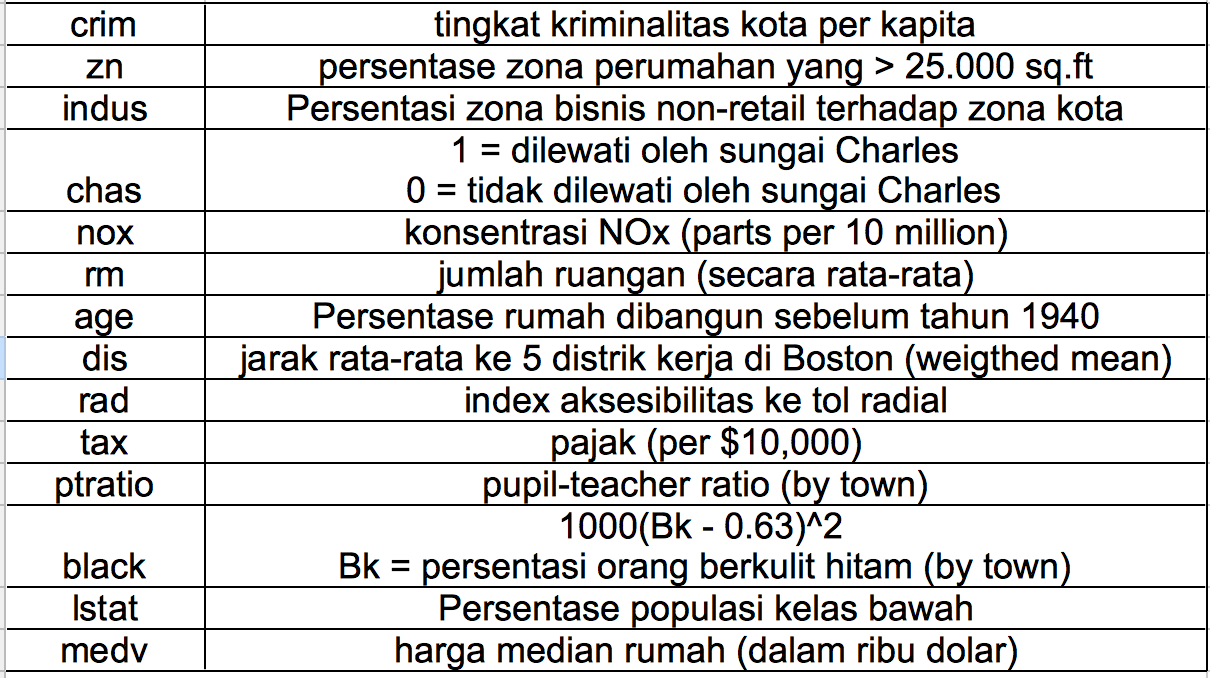

In [3]:
illustration.nomenklatur_house

# import Data

In [4]:
df = pd.read_csv("data/house_price.csv", index_col="ID")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


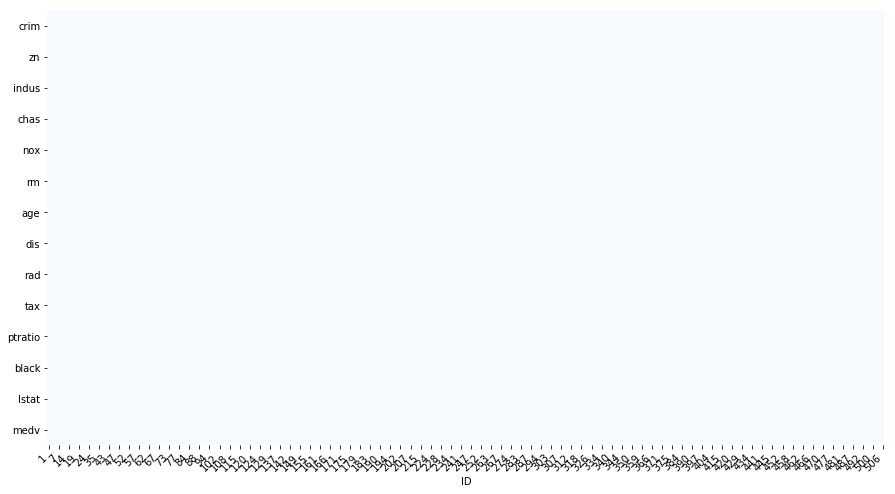

In [6]:
plot_missing_value(df)

In [7]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

In [11]:
X_train.drop(columns= 'chas').columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

# Training

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

/Users/greatbrother/opt/miniconda3/envs/jcopml/lib/python3.6/site-packages/jcopml/tuning/_grid_search.py:7: UserWarning: Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.
  warnings.warn("Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.")
/Users/greatbrother/opt/miniconda3/envs/jcopml/lib/python3.6/site-packages/jcopml/tuning/_random_search.py:7: UserWarning: Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.
  warnings.warn("Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.")
/Users/greatbrother/opt/miniconda3/envs/jcopml/lib/python3.6/site-packages/jcopml/tuning/_bayes_search.py:7: UserWarning: Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.
  warnings.warn("Since jcopml 1.0.7, use `algo` as step name in pipeline instead of knn, xgb, rf, etc.")


In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 
                             'rad', 'tax', 'ptratio', 'black', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas']),
])

In [25]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [26]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   48.2s finished
/Users/greatbrother/opt/miniconda3/envs/jcopml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algo__max_depth': 20, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9790719526408594 0.8390061995179177 0.9128248123268368


# Scaling membantu SVM dan KNN, tapi tidak untuk RF

karena scaling tidak berpengaruh ke algoritma berbasis tree, tapi rf bisa melakukan feature importance

# Feature Importance

### Mean Loss Decrease 

kita akan melihat rata-rata pengurangan error/loss yang dikontribusikan oleh tiap fitur.<br>
Untuk kasus klasifikasi, loss yang dipakai adalah `gini-impurity`, jadi sering disebut juga `mean impurity decrease`<br>
Untuk kasus regresi, loss yang dipakai adalah `MSE`, mungkin bisa disebut sebagai `mean MSE decrease` (?)<br>
boleh coba cek tooltip dari random forest, loss yang dimaksud adalah `criterion`

Semakin besar loss yang berhasil diturunkan oleh suatu fitur, maka semakin penting fitur tersebut

In [22]:
from jcopml.feature_importance import mean_loss_decrease

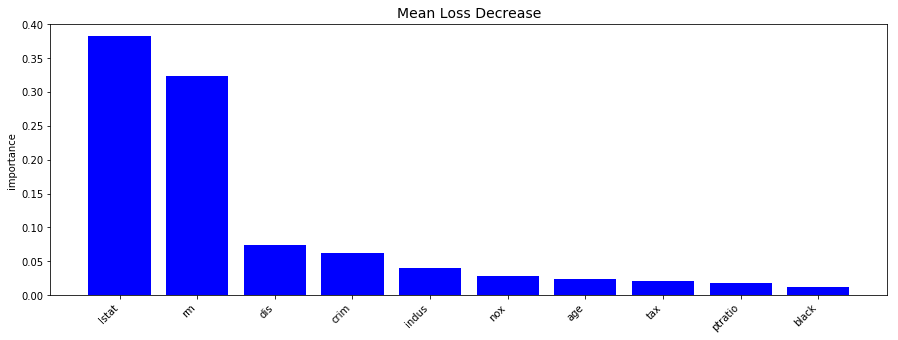

In [27]:
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=10)

### Mean Score Decrease

kita acak masing-masing variabel dan lihat berapa pengurangan score yang terjadi. Semakin besar penurunan score, artinya fitur itu semakin penting

In [28]:
from jcopml.feature_importance import mean_score_decrease

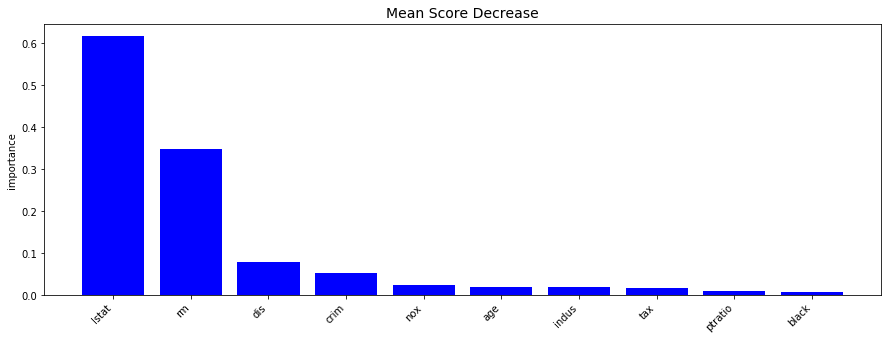

In [29]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [30]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'rm', 'dis', 'lstat']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   40.8s finished
/Users/greatbrother/opt/miniconda3/envs/jcopml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9765197509528044 0.8193368012306286 0.9037633679781792


# Correlation-Causation Fallacy

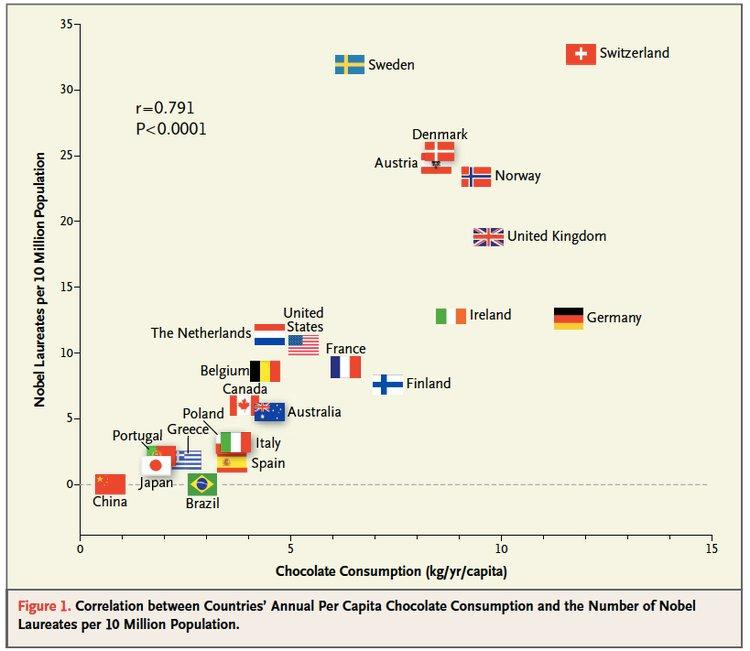

In [31]:
illustration.fallacy1

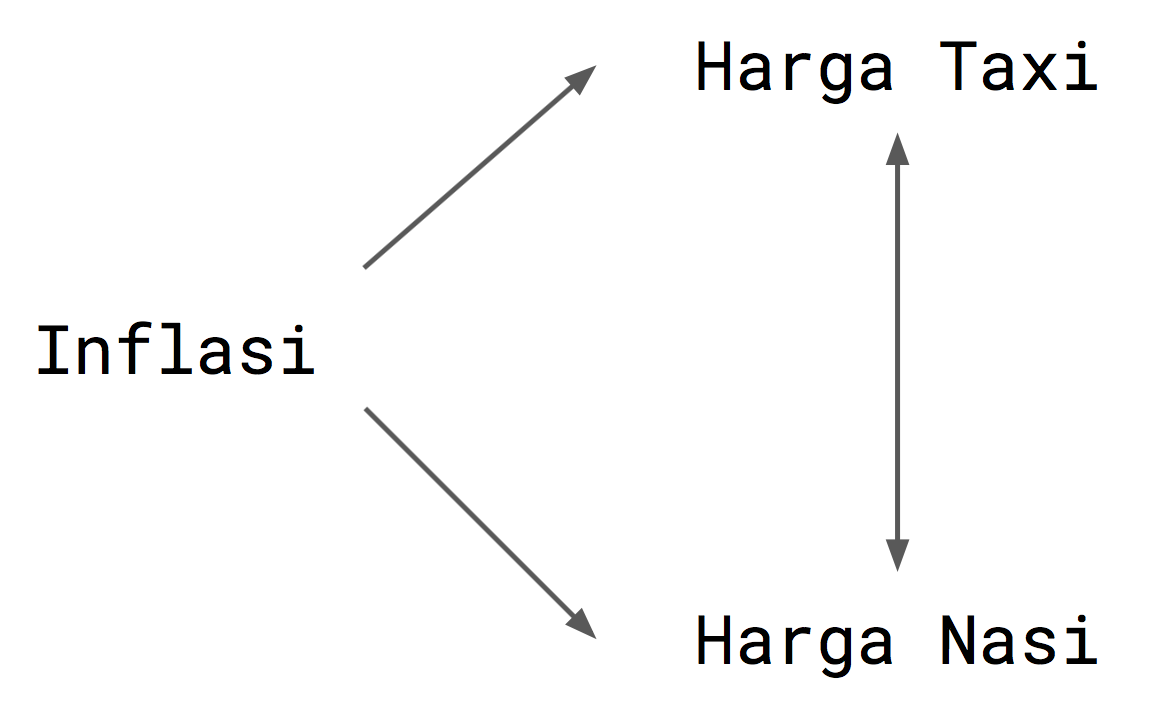

In [32]:
illustration.fallacy2

# Prediction

In [33]:
X_train.iloc[:1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
ID,,,,,,,,,,,,,
340,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.9,9.74


In [35]:
pred_data = [
    [0.01, 50, 3, 1, 0.8, 3, 20, 4, 1, 300, 10, 400, 5]
]

X_pred = pd.DataFrame(pred_data, columns=X_train.columns)
X_pred

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.01,50,3,1,0.8,3,20,4,1,300,10,400,5


In [36]:
model.predict(X_pred)

array([23.9665])

# Save Model

In [37]:
save_model(model.best_estimator_, "rf_house.pkl")

Model is pickled as model/rf_house.pkl
